In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
bank_info = pd.read_csv('bank-additional-full.csv', delimiter=";")
bank_info.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
age = bank_info.age
duration = bank_info.duration
call_time = bank_info.campaign
prev_contact = bank_info.previous
euribor3m = bank_info.euribor3m

In [4]:
j = bank_info.job
job = pd.get_dummies(j)
job.drop([job.columns[0]], axis=1, inplace=True)

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
m = bank_info.marital
#m[(m == 'divorced')|(m == 'married')].loc[:]= 'married_current_or_before'?
m[(m == 'divorced')|(m == 'married')] = 'married_current_or_before'
m[(m == 'single') | (m == 'unknown')] = 'not_married'
marital = pd.get_dummies(m)
marital.drop([marital.columns[0]], axis=1, inplace=True)

In [7]:
e = bank_info.education
e[(e == 'illiterate')|(e == 'basic.4y')|(e == 'basic.6y')|(e == 'basic.9y')]= 'high_school_below'
e[(e == 'university.degree')|(e == 'professional.course')|(e == 'unknown')] = 'high_school_above'
education = pd.get_dummies(e)
education.drop([education.columns[0]], axis=1, inplace=True)

In [8]:
contact = pd.get_dummies(bank_info.contact)
contact.drop([contact.columns[0]], axis=1, inplace=True)

In [9]:
ne = bank_info['nr.employed']
ne[(ne == 4963.6)|(ne == 4991.6)|(ne == 5008.7)|(ne == 5017.5)|(ne == 5023.5)|(ne == 5076.2)] = '5099_below'
ne[(ne == 5176.3)|(ne == 5191.0)|(ne == 5195.8)|(ne == 5228.1)] = '5100_above'
number_employed = pd.get_dummies(ne)
number_employed.drop([number_employed.columns[0]], axis=1, inplace=True)

In [10]:
month = pd.get_dummies(bank_info.month)
month.drop([month.columns[0]], axis=1, inplace=True)

In [11]:
day_of_week = pd.get_dummies(bank_info.day_of_week)
day_of_week.drop([day_of_week.columns[0]], axis=1, inplace=True)

In [12]:
p = bank_info.pdays
p[p != 999] = '0-27'
last_contact = pd.get_dummies(p)
last_contact.drop([last_contact.columns[0]], axis=1, inplace=True)

In [13]:
prev_outcome = pd.get_dummies(bank_info.poutcome)
prev_outcome.drop([prev_outcome.columns[0]], axis=1, inplace=True)

In [14]:
emp_var_rate = pd.get_dummies(bank_info['emp.var.rate'])
emp_var_rate.drop([emp_var_rate.columns[0]], axis=1, inplace=True)
cons_price_idx  = pd.get_dummies(bank_info['cons.price.idx'])
cons_price_idx.drop([cons_price_idx.columns[0]], axis=1, inplace=True)
cons_conf_idx = pd.get_dummies(bank_info['cons.conf.idx'])
cons_conf_idx.drop([cons_conf_idx.columns[0]], axis=1, inplace=True)

In [25]:
hou_loan = pd.get_dummies(bank_info.housing)
hou_loan.drop([hou_loan.columns[0]], axis=1, inplace=True)
per_loan = pd.get_dummies(bank_info.loan)
per_loan.drop([per_loan.columns[0]], axis=1, inplace=True)

In [27]:
defa = bank_info.default
defa[defa == 'yes'] = 'unknown'
default = pd.get_dummies(defa)
default.drop([default.columns[0]], axis=1, inplace=True)

In [17]:
output = pd.get_dummies(bank_info.y).yes
output = output.rename("y")

In [56]:
data_df = pd.concat([age, job, marital, education, default, hou_loan, per_loan, contact, month, 
                  duration, call_time, day_of_week, last_contact, prev_contact, prev_outcome, 
                  emp_var_rate, number_employed, cons_price_idx, cons_conf_idx, euribor3m, output], axis=1)
pd.set_option('display.max_columns', None)
data_df.head()
data_df.shape

(41188, 103)

In [49]:
#excluding age, personal loan, housing loan, marital, job and month
data_df = pd.concat([education, default, contact, duration, call_time, day_of_week, last_contact, 
                    prev_contact, prev_outcome, emp_var_rate, number_employed, cons_price_idx, cons_conf_idx, 
                     euribor3m, output], axis=1)
pd.set_option('display.max_columns', None)
data_df.head()
data_df.shape

(41188, 77)

In [57]:
#Standardize variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a = data_df.drop([data_df.columns[-1]], axis=1)
scaler.fit(a)
b = pd.DataFrame(scaler.transform(a))
b['y'] = data_df.iloc[:,-1]
b.columns = data_df.columns
b.head()

,age,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,not_married,high_school_above,high_school_below,unknown,unknown,yes,unknown,yes,telephone,aug,dec,jul,jun,mar,may,nov,oct,sep,duration,campaign,mon,thu,tue,wed,0-27,previous,nonexistent,success,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4,5099_below,5100_above,92.37899999999999,92.431,92.469,92.649,92.713,92.756,92.84299999999999,92.89299999999999,92.963,93.075,93.2,93.369,93.444,93.749,93.79799999999999,93.876,93.91799999999999,93.994,94.027,94.055,94.199,94.215,94.465,94.601,94.76700000000001,-50.0,-49.5,-47.1,-46.2,-45.9,-42.7,-42.0,-41.8,-40.8,-40.4,-40.3,-40.0,-39.8,-38.3,-37.5,-36.4,-36.1,-34.8,-34.6,-33.6,-33.0,-31.4,-30.1,-29.8,-26.9,euribor3m,y
0,1.533034,-0.538317,-0.19143,6.152772,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449,-0.158872,-0.089871,-0.627943,-0.931813,1.512246,-0.513713,-0.156933,-1.048877,-0.156933,-0.422872,1.31827,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,0.010471,-0.565922,1.959,-0.514581,-0.494394,-0.496067,-0.195415,-0.349494,0.397706,-0.1857,-0.064757,-0.205121,-0.53569,-0.138299,-0.125134,-0.015584,-0.313369,2.075013,-0.806571,-0.370184,0.698189,-0.080776,-0.104746,-0.065882,-0.093506,-0.064757,-0.015584,-0.083029,-0.404599,-0.132914,-0.251923,-0.310229,-0.080318,-0.379075,-0.065134,-0.040365,-0.071929,-0.440172,2.075013,-0.075427,-0.074773,-0.086087,-0.087225,-0.344693,-0.070552,-0.055834,-0.083029,-0.070552,-0.251923,-0.404599,-0.015584,-0.440172,-0.310229,-0.344693,-0.132914,-0.040365,-0.087225,-0.071929,-0.074773,-0.075427,-0.086087,2.075013,-0.379075,-0.080318,-0.065134,-0.065882,-0.064757,-0.138025,-0.093506,-0.080776,-0.104746,0.71246,0
1,1.628993,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449,-0.158872,-0.089871,-0.627943,-0.931813,-0.661268,1.946613,-0.156933,-1.048877,-0.156933,-0.422872,1.31827,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.421501,-0.565922,1.959,-0.514581,-0.494394,-0.496067,-0.195415,-0.349494,0.397706,-0.1857,-0.064757,-0.205121,-0.53569,-0.138299,-0.125134,-0.015584,-0.313369,2.075013,-0.806571,-0.370184,0.698189,-0.080776,-0.104746,-0.065882,-0.093506,-0.064757,-0.015584,-0.083029,-0.404599,-0.132914,-0.251923,-0.310229,-0.080318,-0.379075,-0.065134,-0.040365,-0.071929,-0.440172,2.075013,-0.075427,-0.074773,-0.086087,-0.087225,-0.344693,-0.070552,-0.055834,-0.083029,-0.070552,-0.251923,-0.404599,-0.015584,-0.440172,-0.310229,-0.344693,-0.132914,-0.040365,-0.087225,-0.071929,-0.074773,-0.075427,-0.086087,2.075013,-0.379075,-0.080318,-0.065134,-0.065882,-0.064757,-0.138025,-0.093506,-0.080776,-0.104746,0.71246,0
2,-0.290186,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449,-0.158872,-0.089871,-0.627943,-0.931813,-0.661268,-0.513713,-0.156933,0.953401,-0.156933,-0.422872,1.31827,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.124520,-0.565922,1.959,-0.514581,-0.494394,-0.496067,-0.195415,-0.349494,0.397706,-0.1857,-0.064757,-0.205121,-0.53569,-0.138299,-0.125134,-0.015584,-0.313369,2.075013,-0.806571,-0.370184,0.698189,-0.080776,-0.104746,-0.065882,-0.093506,-0.064757,-0.015584,-0.083029,-0.404599,-0.132914,-0.251923,-0.310229,-0.080318,-0.379075,-0.065134,-0.040365,-0.071929,-0.440172,2.075013,-0.075427,-0.074773,-0.086087,-0.087225,-0.344693,-0.070552,-0.055834,-0.083029,-0.070552,-0.251923,-0.404599,-0.015584,-0.440172,-0.310229,-0.344693,-0.132914,-0.040365,-0.087225,-0.071929,-0.074773,-0.075427,-0.086087,2.075013,-0.379075,-0.080318,-0.065134,-0.065882,-0.064757,-0.138025,-0.093506,-0.080776,-0.104746,0.71246,0
3,-0.002309,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449,-0.158872,-0.089871,-0.627943,-0.931813,1.512246,-0.513713,-0.156933,-1.048877,-0.156933,-0.422872,1.31827,-0.

In [58]:
data=np.array(b)
n = data.shape[0]
d = data.shape[1]
d -= 1
n_train = int(n*0.7)
n_test = int(n*0.2)
n_validate  = n - n_train - n_test
data = np.random.permutation(data)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
X_validate = np.zeros((n_validate,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))
Y_validate = np.zeros((n_validate))

X_train[:] = data[:n_train,:-1]
Y_train[:] = data[:n_train,-1]

X_test[:] = data[n_train:(n_train+n_test),:-1]
Y_test[:] = data[n_train:(n_train+n_test),-1]

X_validate[:] = data[(n_train+n_test):, :-1]
Y_validate[:] = data[(n_train+n_test):,-1]

print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_validate.shape)

(28831, 102)
(8237, 102)
(4120, 102)
(28831,)
(8237,)
(4120,)


In [59]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
# presenting features and their corresponding coefficients
features = pd.DataFrame(a.columns, columns=['features'])[:-1]
coefficients = pd.DataFrame(abs(model1.coef_)).unstack().unstack()
results = pd.concat([features, coefficients], axis=1)
results.columns = ['features', 'coefficients']
results.sort_values(by='coefficients')

,features,coefficients
16,unknown,0.000201
18,unknown,0.000201
24,jun,0.002020
19,yes,0.002718
11,unknown,0.003614
33,thu,0.003649
27,nov,0.005311
21,aug,0.007383
6,self-employed,0.007478
14,high_school_below,0.008017


In [20]:
number = np.array(range(0,8237))
number

array([   0,    1,    2, ..., 8234, 8235, 8236])

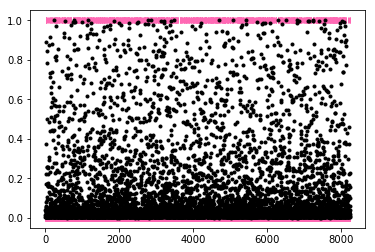

In [21]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
probability = model1.predict_proba(X_test)[:,1]
#prob_sorted = sorted(probability)
plt.plot(number, Y_test, '|', color ='hotpink')
plt.plot(number, probability, '.', color ='black')

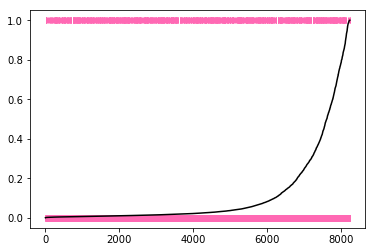

In [25]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
probability = model1.predict_proba(X_test)[:,1]
prob_sorted = sorted(probability)
plt.plot(number, Y_test, '|', color ='hotpink')
plt.plot(number, prob_sorted, color ='black')

In [54]:
print(model1.score(X_test, Y_test))

0.91853830278


In [40]:
#report for including all the data
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.97      0.95      7303
        yes       0.69      0.45      0.55       934

avg / total       0.90      0.91      0.91      8237



In [46]:
#report for excluding housing loan and personal loan
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.97      0.95      7278
        yes       0.68      0.42      0.52       959

avg / total       0.90      0.91      0.90      8237



In [51]:
#report for excluding cons_price_idx and cons_conf_idx
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.98      0.95      7296
        yes       0.70      0.41      0.52       941

avg / total       0.90      0.91      0.90      8237



In [71]:
#report for excluding features with low coefficients 
#(age, duration, nr.employed, default, housing loan, campaign, previous, marital, education)
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.91      0.99      0.95      7335
        yes       0.71      0.23      0.35       902

avg / total       0.89      0.91      0.88      8237



In [81]:
#report for excluding 
#(age, duration, nr.employed)
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.91      0.99      0.94      7283
        yes       0.67      0.22      0.33       954

avg / total       0.88      0.90      0.87      8237



In [34]:
#report for excluding age, personal loan, housing loan and marital
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.98      0.95      7339
        yes       0.68      0.43      0.53       898

avg / total       0.91      0.92      0.91      8237



In [48]:
#report for excluding age, personal loan, housing loan , marital and job
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.97      0.95      7329
        yes       0.67      0.44      0.53       908

avg / total       0.90      0.91      0.91      8237



In [55]:
#report for excluding age, personal loan, housing loan, marital, job and month
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.94      0.97      0.96      7352
        yes       0.68      0.46      0.55       885

avg / total       0.91      0.92      0.91      8237



In [41]:
#report for excluding age, personal loan, housing loan, marital, job, month and day of week
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.97      0.95      7292
        yes       0.67      0.43      0.52       945

avg / total       0.90      0.91      0.90      8237

